In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

### E-commerce behavior dataset: Session information for converting customers

In [2]:
df = pd.read_csv("./Ecommerce Customers.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Goal: predict yearly amount spent

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### EDA

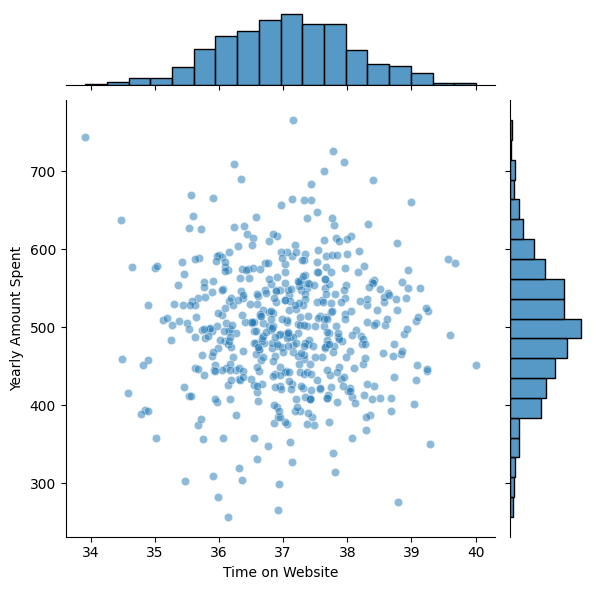

In [6]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, alpha=0.5)

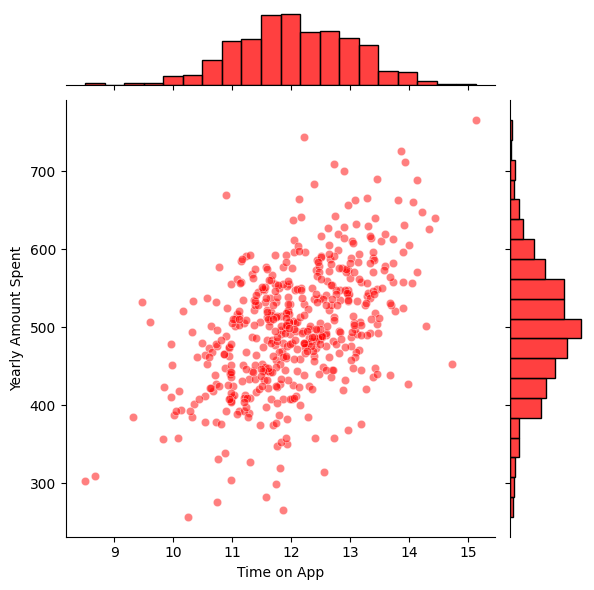

In [7]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df, alpha=0.5, color="r")

# shows faint correlation

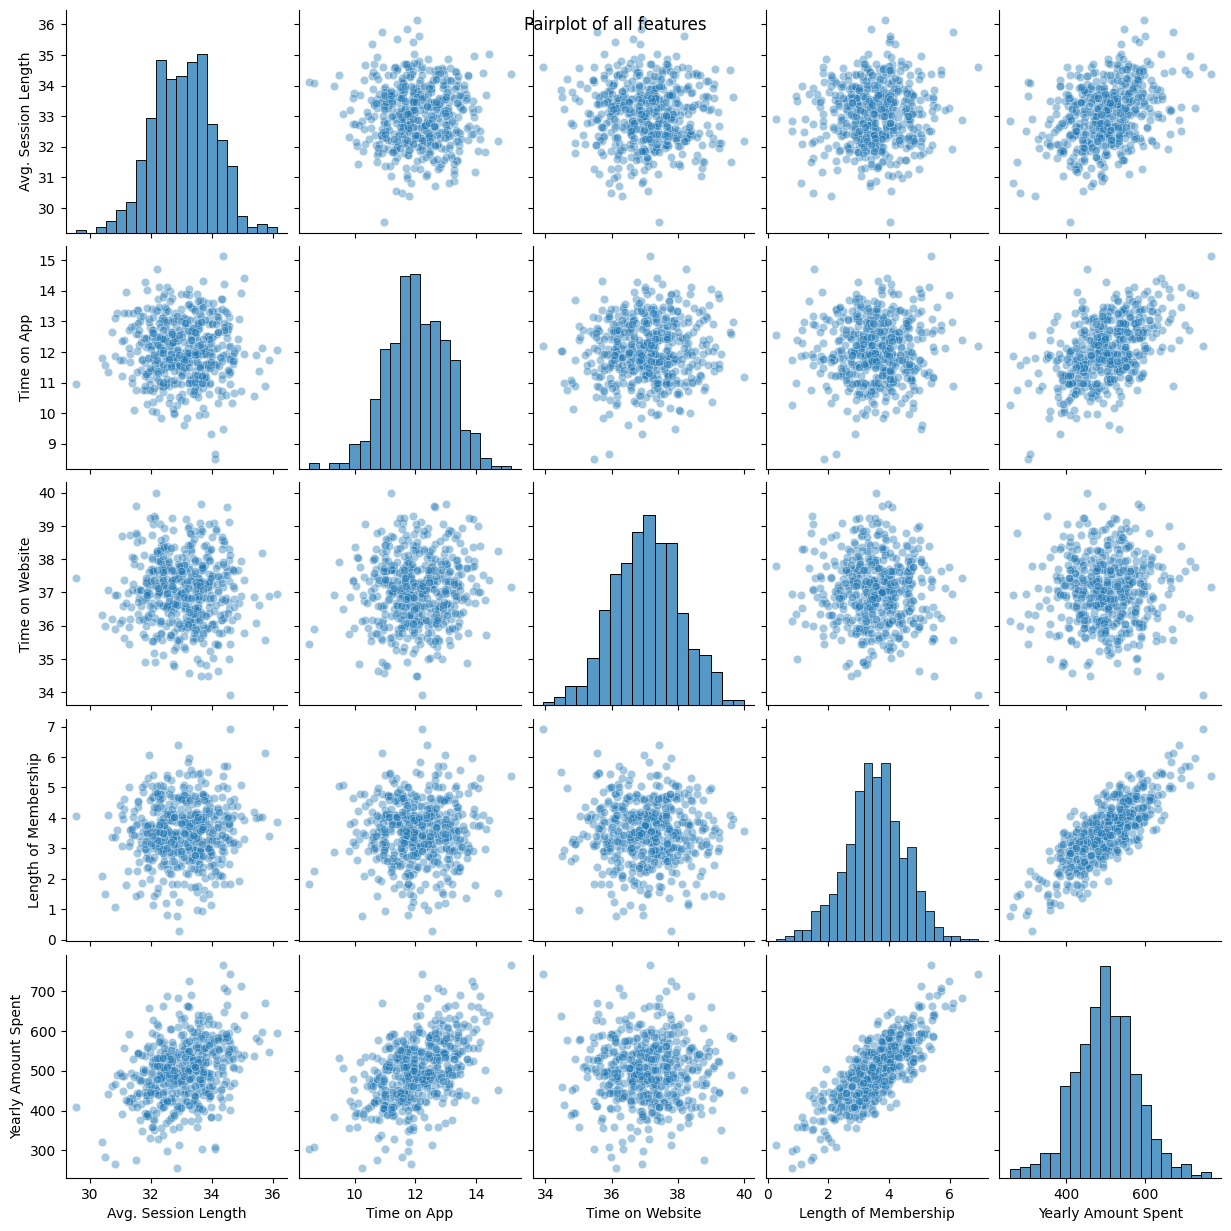

In [32]:
sns.pairplot(data=df, kind="scatter", plot_kws={"alpha": 0.4})
plt.suptitle("Pairplot of all features")
plt.show()

Text(0.5, 1.0, 'Length of Membership vs. Yearly Amount Spent')

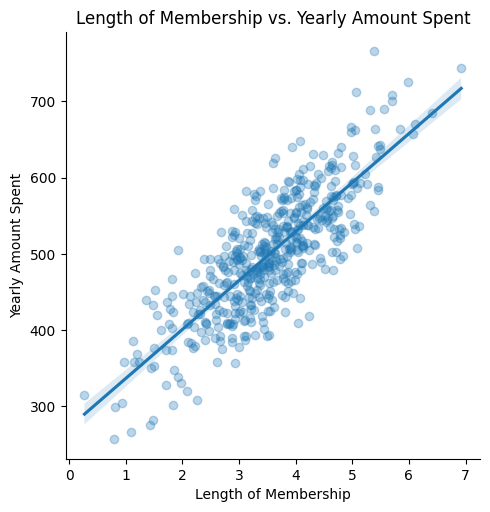

In [9]:
sns.lmplot(
    x="Length of Membership",
    y="Yearly Amount Spent",
    data=df,
    scatter_kws={"alpha": 0.3},
)
plt.title("Length of Membership vs. Yearly Amount Spent")
# quite a strong correlation (just visually)

### Linear Regression (from scratch) for prediction
#### Training
- initialize weights as zero
- initialize bias as zero
#### Given a data point:
- predict result by y^ = wx + b
- calculate error
- use gradient descent to figure out new weights and bias values
- repeat n times
#### Testing
Given a data point:
- put in the values from the data point into y^ = wx+b

In [10]:
from LinReg import LinearRegression, MSE
from sklearn.model_selection import train_test_split

In [11]:
# Split the data into train and test
X = df[
    ["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]
]
y = df["Yearly Amount Spent"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [12]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the target if necessary
y_train_scaled = y_train / np.max(y_train)
y_test_scaled = y_test / np.max(y_test)

In [13]:
# Perform LR on scaled data
reg = LinearRegression()
reg.fit(X_train_scaled, y_train_scaled)
predictions_scaled = reg.predict(X_test_scaled)

# Metrics
mse = MSE(y_test_scaled, predictions_scaled)
print(mse)

0.08873635814214534


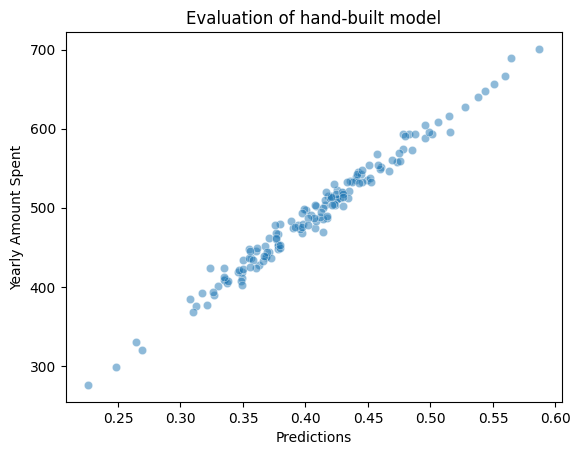

In [14]:
sns.scatterplot(x=predictions_scaled, y=y_test, alpha=0.5)
plt.xlabel("Predictions")
plt.title("Evaluation of hand-built model")
plt.show()

In [15]:
residuals = y_test - predictions_scaled
print(residuals)

361    400.702867
73     534.327870
374    418.253493
155    503.563093
104    409.734122
          ...    
266    553.552233
23     518.924811
222    501.980060
261    513.579669
426    530.324181
Name: Yearly Amount Spent, Length: 150, dtype: float64


Text(0.5, 1.0, 'Residuals distribution')

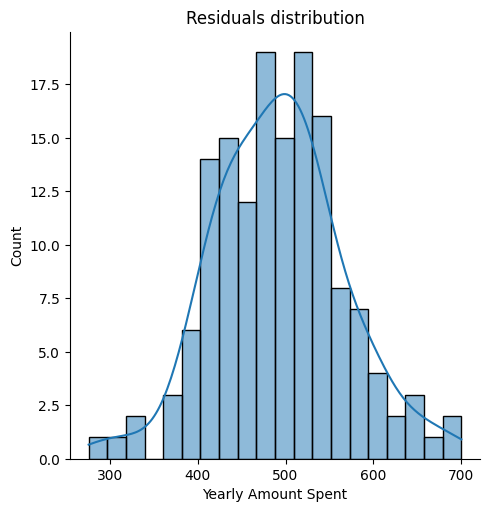

In [16]:
sns.displot(residuals, bins=20, kde=True)
plt.title("Residuals distribution")

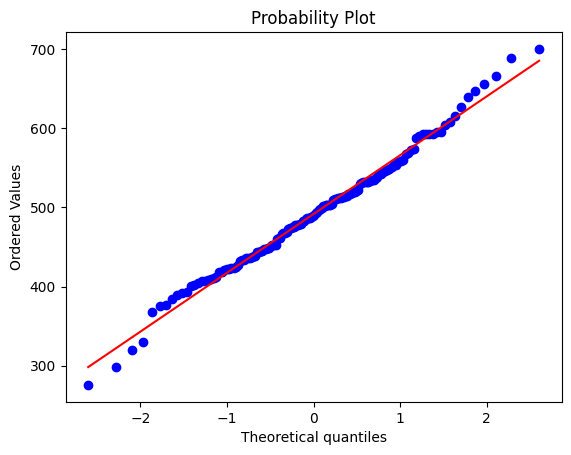

In [17]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

### Linear Regression (from sklearn) for prediction

In [18]:
# Split the data into train and test
X = df[
    ["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]
]
y = df["Yearly Amount Spent"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [19]:
# training the model
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [22]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])
print(cdf)

                          Coeff
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


#### Predictions

In [23]:
predictions = lm.predict(X_test)
predictions[:5]

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559])

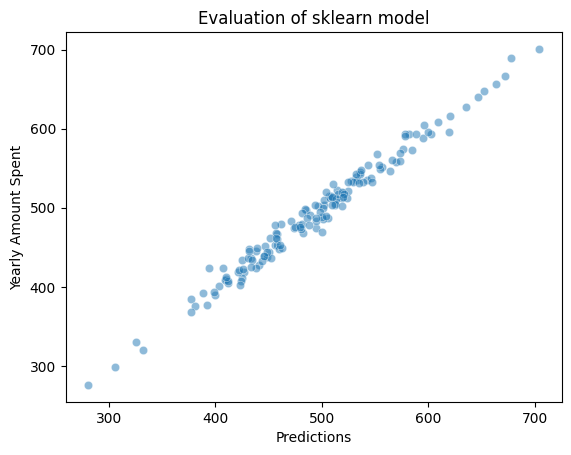

In [24]:
sns.scatterplot(x=predictions, y=y_test, alpha=0.5)
plt.xlabel("Predictions")
plt.title("Evaluation of sklearn model")
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  8.42609164143206
Mean Squared Error:  103.91554136503244
RMSE:  10.19389726086311


#### Residuals 
Confirm that distances between model predictions and actual values are random and normally distributed

In [27]:
residuals = y_test - predictions
print(residuals)

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64


Text(0.5, 1.0, 'Residuals distribution')

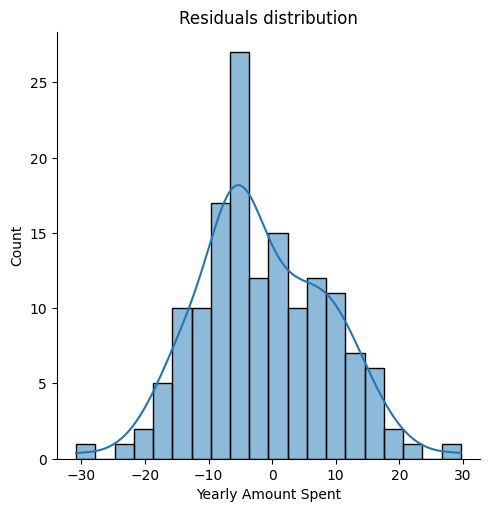

In [28]:
sns.displot(residuals, bins=20, kde=True)
plt.title("Residuals distribution")

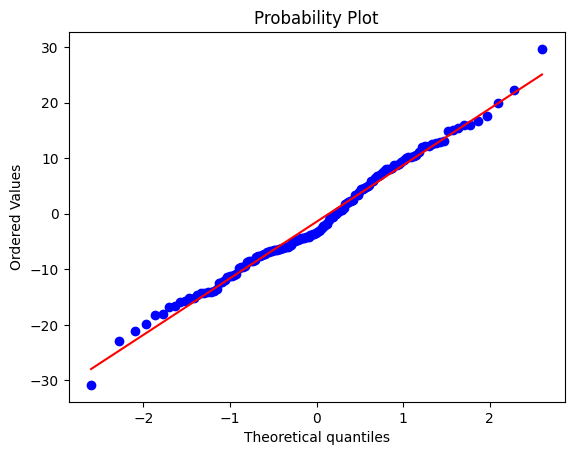

In [29]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()